# 4주차 과제 2번째

#### 통계학과 201618968 김종원

### Import 

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

### 예제2: polynomial regression 

$y_i=w_0+w_1x_i + w_2 x_i^2 + w_3 x_i^3 +\epsilon_i$

`-` 모형

In [2]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
X=torch.vstack([x,x**2,x**3]).T
W=torch.tensor([[4.0],[3.0],[-2.0]])
bias=1.0 
ϵ=torch.randn(100,1)
y=X@W+bias + ϵ

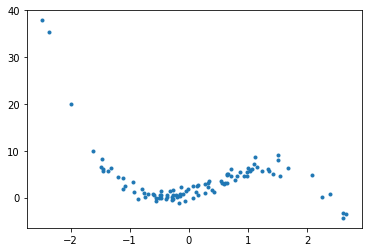

In [3]:
plt.plot(X[:,0],y,'.')
#plt.plot(X[:,0],X@W+bias,'--')

`-` 아키텍처 

In [4]:
net = torch.nn.Linear(in_features=3,out_features=1,bias=True) 

`-` 손실함수 

In [5]:
loss_fn=torch.nn.MSELoss() 

`-` 옵티마이저 

In [6]:
optimizer= torch.optim.SGD(net.parameters(),lr=0.1) 

`-` step1~4

In [7]:
for epoc in range(1000): 
    ## 1
    yhat=net(X)
    ## 2
    loss=loss_fn(y,yhat)
    ## 3
    loss.backward()
    ## 4
    optimizer.step() 
    net.zero_grad()

In [8]:
list(net.parameters())

[Parameter containing:
 tensor([[nan, nan, nan]], requires_grad=True), Parameter containing:
 tensor([nan], requires_grad=True)]

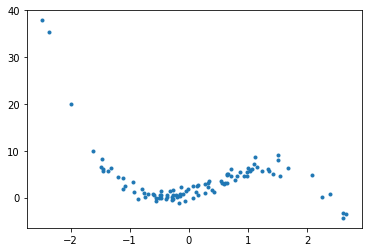

In [9]:
plt.plot(X[:,0],y,'.')
plt.plot(X[:,0],yhat.data,'--')

 모든 가중치 값이 nan으로 나옵니다.


 lr 는 2주차에서 배운 학습률인데, 이것을 너무 큰 값으로 설정하면 loss 값이 0으로 수렴하는 것이 아닌 발산하는 현상이 발생하게 됩니다. 따라서 lr=0.1 은 너무 큰 값이기 때문에 nan을 출력합니다.


`-` pytorch 연산 중 nan 값이 나오는 경우는 여러 가지가 있다고 하는데 이번 케이스는 무한대를 표현하는 과정에서 어떤 값을 0으로 나눠서 생기는 현상으로 보입니다. ( x = a (a는 상수) )